<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/ML_With_Python/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_%EB%85%B8%EB%93%9C8_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# 자연어 처리 기초
# 형태소 분석기
# konlpy: 한국어 처리를 위한 형태소 분석기
# 형태소 : 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위
# 라이브러리 불러오기
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [71]:
# konlpy 설치
!pip install konlpy

In [72]:
# 라이브러리 불러오기(Okt) Open Korean Text
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [73]:
# 토큰화 (형태소 단위)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [74]:
# 토큰화 (명사만 추출)
tokenizer.nouns(text)

['탐험', '학교']

In [75]:
# 토큰화 (품사 태깅)
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

In [76]:
# CounterVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer() # 텍스트 데이터를 벡터로 변환


In [77]:
# 단어 토큰화, 형태소 분리 (konlpy 모듈 Okt 클래스 이용)
words = tokenizer.morphs(text)

In [78]:
# 단어 토큰화 (Okt) => 데이터 학습
vect.fit(words)
#vect.fit_transform(words)

CountVectorizer()

In [79]:
# 학습된 어휘
vect.get_feature_names_out()


array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [80]:
# 단어 사전
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [81]:
# 단어 사전 크기
len(vect.vocabulary_)

7

In [82]:
# 인코딩
df_t = vect.transform(words)
type(df_t)

scipy.sparse._csr.csr_matrix

In [83]:
# 인코딩된 데이터 Matrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [84]:
# 어휘와 피치 (데이터 프레임)
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out()) # 단어 사전(vect.vocabulary_) 인코딩(transform) 가시화
#pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names()) # LMS 코드 오류 발생


,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [85]:
# 새로운 단어 등장 => 테스트
test = "AI 공부하며 함께 성장해요!"

In [86]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [87]:
# 인코딩 데이터, Matrix <= 학습 과정 fit()은 건너뛰고 기존 어휘 사전을 기반으로 인코딩만 진행
test_t = vect.transform(words)
type(test_t)

scipy.sparse._csr.csr_matrix

In [88]:
# 인코딩된 데이터 Matrix
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [89]:
# 어휘와 피처 (데이터 프레임)
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out()) # columns=vect.get_feature_names_out() => 어휘 사전

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


In [90]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# tf-idf 활용 어휘 사전 구축
vect = TfidfVectorizer()

# 형태소 분리 (konlpy 모듈 Okt 클래스 이용)
words = tokenizer.morphs(text)

# 단어 토큰화 (Okt) => 데이터 학습 => 단어 사전 구축
vect.fit(words)

# 단어 사전
vect.vocabulary_

# 사전을 인코딩 데이터, Matrix
df_t = vect.transform(words)
df_t.toarray()

# 어휘와 피처 (데이터 프레임)
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())


,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Q. text 변수에 저장된 문자열을 토큰화해주세요.
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [27]:
# 감성 분석
# 데이터 불러오기
# 라이브러리 불러오기
import pandas as pd

In [28]:
# 데이터 불러오기, 네이버 영화 감성 분석 자료(label 0:부정, 1:긍정)
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

In [29]:
# EDA(Exploratory Data Analysis) 및 데이터 전처리
# 데이터 샘플
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [30]:
# 데이터 크기
df.shape

(150000, 3)

In [31]:
# 타겟 확인
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [32]:
# 결측치
df.isnull().sum()


id          0
document    5
label       0
dtype: int64

In [33]:
# 결측치 삭제
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [34]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

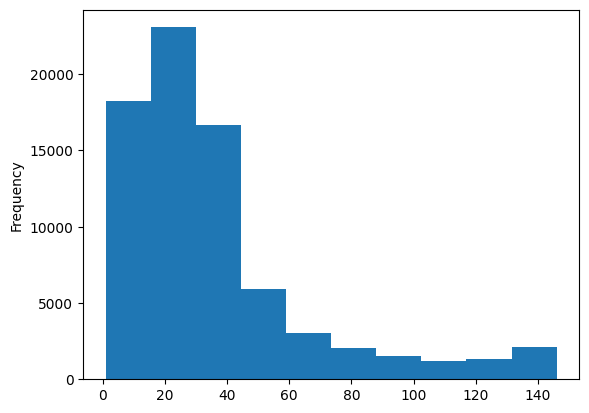

In [35]:
# len 시각화 (label == 0)
import matplotlib.pyplot as plt
df[df['label'] == 0]['len'].plot(kind='hist')

<Axes: ylabel='Frequency'>

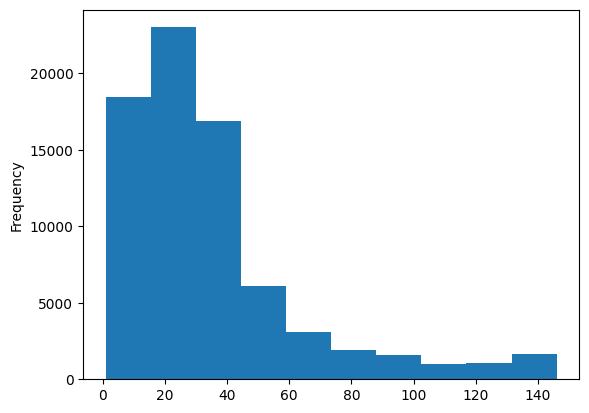

In [36]:
# len 시각화 (label == 1)
df[df['label'] == 1]['len'].plot(kind='hist')

In [37]:
# 데이터 샘플링 df[:1000]
df = df[:1000]
df.shape

(1000, 4)

In [38]:
# 토큰화
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

# 어휘와 피처 (데이터 프레임)
pd.DataFrame(vectors.toarray(), columns=vect.get_feature_names_out())

,!,!!,!!!,!!!!,!!!!!!!!!!!!!!,!!.,!~,"""","""""",""""".",...,희한함이,히,히어로,힘겨,힘내요,힘든,힘들,힘들게,힘들었네요,힘알
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# 머신러닝, 지도학습 분류 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2023 ) # 하이퍼파라미터 최적화 ???
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()
# 0.6713502206271129

0.6713502206271129

In [40]:
# [참고] 머신러닝, 지도학습 분류 의사결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=2023 )
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()
# 0.587938655812742

0.587938655812742

In [41]:
# [참고 ]머신러닝, 지도학습 분류 XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model = XGBClassifier(random_state=2023)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()


0.6405218605724251

In [42]:
# Q. 다음 df에 변수에 담긴 영화리뷰 데이터에서 label에는 0과 1의 값이 존재합니다. 어떤 값이 긍정이고 부정일까요?
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")
df.head(10)
# label "0" => 부정
# label "1" => 긍정

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [43]:
# Q. df 변수에 담긴 데이터를 영상을 참고하여 머신러닝 모델로 돌리기 위한 전처리를 모두 진행해주세요.
# 전처리를 잘 완료하셨다면 바로 아래 코드 블럭의 실행이 정상적으로 실행될 겁니다.
import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
df = df.dropna() # 결측치 삭제
df = df[:1000]
# 토큰화
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

In [44]:
# 머신러닝 모델 정상 작동 확인
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6634352457852256

In [92]:
# 3. 자연어 전처리
# 어휘 사전 구축
# 토큰화(max_df) N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df=10)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()
# 0.643

0.643

In [93]:
# 토큰화(min_df) N개 보다 작은 단어 수 무시
vect = CountVectorizer(tokenizer = tokenizer.morphs, min_df=2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()
# 0.689

0.689

In [ ]:
# 토큰화 max_df & min_df 동시 적용
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df=10, min_df=2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()
# 0.641

In [47]:
# 불용어(stopword)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
stop_words = ['하며', 'ai']
vect = CountVectorizer(stop_words = stop_words)
# 단어 토큰화, 형태소 분리 (konlpy 모듈 Okt 클래스 이용)
words = tokenizer.morphs(text)
# 단어 토큰화 (Okt) => 데이터 학습 => 단어 사전 구축
vect.fit(words)
# 단어 사전
vect.vocabulary_


{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

In [48]:
# py-hanspell 설치
#!pip install git+https://github.com/jungin500/py-hanspell
#!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-hkldxhpd
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-hkldxhpd
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 5bb0b3e8f62c1936a430745297821a9ecd78beb1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.4/371.4 kB 31.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing backend dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install backend dependencies di

In [49]:
# 뛰어쓰기
from pykospacing import Spacing
spacing = Spacing()
text = "함께탐험하며성장하는AI학교AIFFEL"
spacing(text)


ModuleNotFoundError: ignored

In [ ]:
# 반복되는 글자 정리
# 더 자세히 https://github.com/lovit/soynlp
# soynlp 설치
!pip install soynlp

In [ ]:
# 댓글 데이터에 등장하는 반본되는 이모티콘 정리
from soynlp.normalizer import *
emoticon_normalize('하하하하하하ㅋㅋㅋㅋㅋㅋ호호호호호호ㅠㅠㅠㅠㅠㅠ', num_repeats=3)

In [ ]:
# 맞춤법 검사기
# 더 자세히 https://github.com/ssut/py-hanspell
# py-habspell 설치
! pip install git+https://github.com/ssut/py-hanspell.git

In [94]:
# 맞춤법 검사
from hanspell import spell_checker
text = "알파고 이전, 2015년부터 만들 어진 최초의AI 커뮤니티 모두의연구소, 학연, 지연, 모두연이라는 말이나올만큼 AI의 보금자리로서 중요한 역할을 하고있는 모두의 연구소에서 만들었습니다. AI 기술을 커뮤니티로 배우는 유일한 기관 아이펠과 함께 밝은 미래를 만들어보세요 "

ModuleNotFoundError: ignored

In [ ]:
# 맞춤법 검사 후 수정된 문장
result = spell_checker.check(text)
result.checked

In [50]:
# Q. 다음은 영화 리뷰 데이터를 전처리하고 머신러닝 모델을 돌리는 코드입니다.
# 아래 코드를 수정하여 토큰화(max_df) 10,15,20개보다 큰 단어 수 무시하기를 각각 설정하고,
# 바로 아래 코드 블럭의 모델을 돌려 결과 값을 비교해보세요.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import konlpy
from konlpy.tag import Okt

# 데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")
# 결측치 삭제
df = df.dropna()
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
# 데이터 샘플링
df = df[:1000]
# 토큰화
tokenizer = Okt()
vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df=20)
vectors = vect.fit_transform(df['document'])

# 머신러닝 모델 작동 확인
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()
# max_df=10 => 0.6300776326538058
# max_df=15 => 0.6397803806582216
# max_df=20 => 0.6817517114020853

0.6817517114020853

In [ ]:
# Q. 다음은 영화 리뷰 데이터를 전처리하고 머신러닝 모델을 돌리는 코드입니다.
# 아래 코드를 수정하여 토큰화(max_df) 10,15,20개보다 큰 단어 수 무시하기를 각각 설정하고,
# 바로 아래 코드 블럭의 모델을 돌려 결과 값을 비교해보세요.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import konlpy
from konlpy.tag import Okt

# 데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")
# 결측치 삭제
df = df.dropna()
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
# 데이터 샘플링
df = df[:1000]
# 토큰화
tokenizer = Okt()

max_df = [10, 15, 20]

# 머신러닝 모델 작동 확인
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

for n in max_df:
    vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df=n)
    vectors = vect.fit_transform(df['document'])
    model = RandomForestClassifier(random_state=2022)
    f1_cv_score = cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()
    print(f'max_df={n}, f1 score={f1_cv_score}')
# max_df=10 => 0.6300776326538058
# max_df=15 => 0.6397803806582216
# max_df=20 => 0.6817517114020853